### Load Data & Featurs

In [171]:
import pandas as pd
import numpy as np
from math import ceil
from matplotlib import pyplot as plt


df = pd.read_csv('C:/Users/Mohammadi/Desktop/Coursera/personal-project/course-1/merged.csv')
df = df[df['Processor Type'].str.startswith('i')]
df = df[df['Generation'] != 0].reset_index(drop=True)

m, n = df.shape[0], 29

X, y = np.zeros((n, m)), np.zeros(m)
y = df["Price"]

# cpu: 0-4
X[0] = df['Processor Type'] == "i3"
X[1] = df['Processor Type'] == "i5"
X[2] = df['Processor Type'] == "i7"
X[3] = df['Processor Type'] == "i9"
X[4] = df['Generation']

# storage: 5-7
X[5] = df["Disk Drive"] == "Both"
X[6] = df["SSD"]
X[7] = df["HDD"]

# ram: 8-10
X[8] = df["DDR_Version"] == 3
X[9] = df["DDR_Version"] == 4
X[10] = df["RAM_GB"]

# screen: 11-13
X[11] = df["Size(Inches)"]
X[12] = df["Size(Inches)"] ** 2
X[13] = df["Touchscreen"] == "Yes"

# gpu: 14
X[14] = df["Graphic Card"] == "Yes"

# os: 15-16
X[15] = df["Operating System Type"] == "Windows"
X[16] = df["Operating System Type"] == "Mac"

# company: 17-28
companies = df["Company"].unique()
num_co = len(companies)
for i in range(num_co):
    X[17 + i] = df["Company"] == companies[i]

X = X.T

### Cost Function

In [197]:
def normalized(x):
    mean = np.mean(x, axis=0)
    std_dev = np.std(x, axis=0)
    x_norm = (x - mean) / std_dev
    return x_norm, mean, std_dev

linear_model = lambda w, b, x: np.dot(x, w) + b

def cost_function(w, b, X, y, model):
    m, _ = X.shape
    total_cost = 0
    for i in range(m):
        f = model(w, b, X[i])
        total_cost += (f - y[i]) ** 2
    total_cost = total_cost / (2 * m)

    return total_cost

def gradient_function(w, b, X, y, model):
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        f = model(w, b, X[i])
        dj_db += f - y[i]
        for j in range(n):
            dj_dw[j] += (f - y[i]) * X[i][j]
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

def gradient_descent(w, b, X, y, alpha, model, cost, gradient, num_iters=1000, lambda_=0):
    j_over_iters = np.zeros(num_iters)
    for i in range(num_iters):
        j_over_iters[i] = cost(w, b, X, y, model)
        
        dj_dw, dj_db = gradient(w, b, X, y, model)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if not i % ceil(num_iters / 10):
            print(f"iter {i}, cost {j_over_iters[i]:.4f}, avg_grad {np.mean(np.abs(dj_dw)):.4f}")
    
    return w, b, j_over_iters

def predict(w, b, x, model, normalized_columns, mean, stdev, y_mean, y_std):
    x_norm = x.copy()
    x_norm[:, normalized_columns] = (x[:, normalized_columns] - mean) / stdev
    y_norm = model(w, b, x_norm)
    y = y_norm * y_std + y_mean

    return y
    
X_norm = X.copy()
to_normalize = [4, 6, 7, 10, 11, 12]
X_norm[:, to_normalize], X_mean, X_std = normalized(X[:, to_normalize])
y_norm, y_mean, y_std = normalized(y)

w = np.zeros(n)
b = 0

w, b, j_history = gradient_descent(
        w, b, X_norm, y_norm, alpha=0.5,
        model=linear_model, 
        cost=cost_function, 
        gradient=gradient_function, 
        num_iters=100        
)

predicted = predict(w, b, X, linear_model, to_normalize, X_mean, X_std, y_mean, y_std)
print(predicted)

iter 0, cost 0.5000, avg_grad 0.1135
iter 10, cost 0.0644, avg_grad 0.0090
iter 20, cost 0.0514, avg_grad 0.0053
iter 30, cost 0.0462, avg_grad 0.0038
iter 40, cost 0.0434, avg_grad 0.0029
iter 50, cost 0.0415, avg_grad 0.0024
iter 60, cost 0.0401, avg_grad 0.0021
iter 70, cost 0.0389, avg_grad 0.0018
iter 80, cost 0.0380, avg_grad 0.0016
iter 90, cost 0.0372, avg_grad 0.0015
[ 87438.12346201  58821.05355768  67005.8361526   66105.03372323
  57743.78198328  60344.46235704  96226.00263729 121856.84109173
  49199.63631167  56315.51916652  94354.87410774  55442.64530459
  65458.10544894  54800.39841071  59842.3094263   57743.78198328
  59842.3094263   66080.71181893  63882.10874849  60895.25909639
  55228.14015439  49223.95821597  72544.39064544  44026.66765378
  85775.9480681   65458.10544894 122923.35455942  88046.67151055
  57743.78198328  55442.64530459 169466.3929588   49223.95821597
  48146.68664158  60873.08976503  85775.9480681   59136.02641291
  48759.68062436  58821.05355768 125

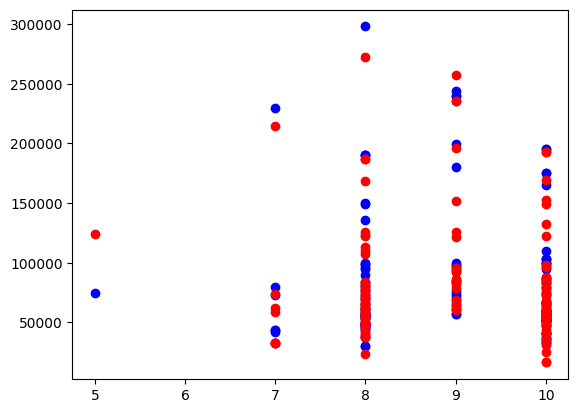

In [200]:
plt.scatter(X[:, 4], y, color='blue')
plt.scatter(X[:, 4], predicted, color='red')
plt.show()

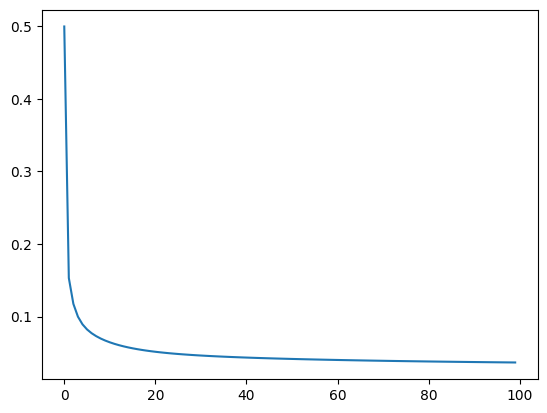

In [199]:
plt.plot(j_history)
plt.show()

In [201]:
print(w)

[-0.09476947 -0.18420167  0.07770314  0.39063259 -0.01100054 -0.00067549
  0.24642077  0.13323597  0.27643105 -0.08706647  0.52837354 -0.07794882
  0.10488681  0.43479315  0.18996444 -0.15542385  0.65031367  0.0412533
 -0.31373193 -0.18235845 -0.14284141 -0.06182612 -0.24418936  0.34314163
  0.34360201 -0.14013852  0.6649109  -0.11845745  0.        ]
